In [1]:
from relax_gen import GEN
import numpy as np

def funcion_test(x):
        return (np.sin(5*x) + 1.5*np.sin(2*x)) * np.exp(-0.1*x**2)


menu = GEN(funcion_test, 
           population=300, 
           i_min=-10, 
           i_max=10
           )

bin_solution = menu.alg_stn_bin()





[INFO] Starting algorithm: Standard Binary for ranking
[INFO] Best solution found: [0.43137255] with fitness: 1.9362022006563004
[INFO] Ending algoritm stand binary for ranking



In [2]:
print(bin_solution)

[0.43137255]


In [3]:
# Ahora probamos el algoritmo cuántico
from relax_gen.gen import GEN
import numpy as np

def funcion_test_quantum(x):
        return (np.sin(5*x) + 1.5*np.sin(2*x)) * np.exp(-0.1*x**2)


menu = GEN(funcion_test_quantum, population=300, i_min=-10, i_max=10
)

quantum_solution = menu.alg_quantum()
print("Solución óptima (cuántico):", quantum_solution)


[INFO] Starting Quantum algorithm
[INFO] Best solution found: 0.39414053559166895 with fitness: 1.9542158657366409
[INFO] Ending Quantum algorithm

Solución óptima (cuántico): 0.39414053559166895


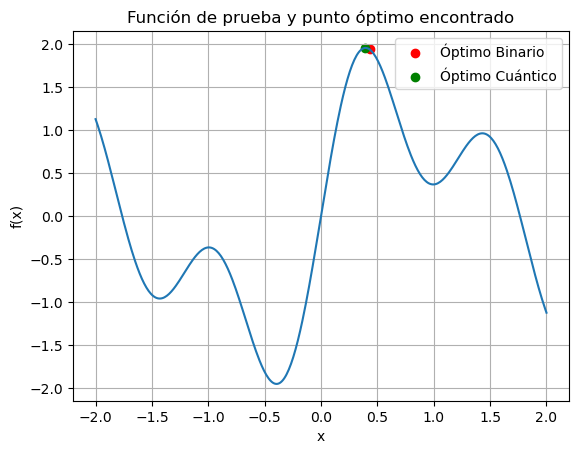

In [4]:
# Graficamos la función
import matplotlib.pyplot as plt
x = np.linspace(-2, 2, 400)
y = funcion_test(x)
plt.plot(x, y)
plt.scatter(bin_solution, funcion_test(bin_solution), color='red', label='Óptimo Binario')  # Punto óptimo encontrado
plt.scatter(quantum_solution, funcion_test_quantum(quantum_solution), color='green', label='Óptimo Cuántico')  # Punto óptimo encontrado cuántico
plt.title('Función de prueba y punto óptimo encontrado')    
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()

In [5]:
import matplotlib.pyplot as plt

Mejor solución EDA Polynomial: [ 3.67516814  4.17218215 -9.26384342 -4.97966293 -5.66824576  2.98652911]
Fitness de la mejor solución EDA Polynomial: 36.341687312231315


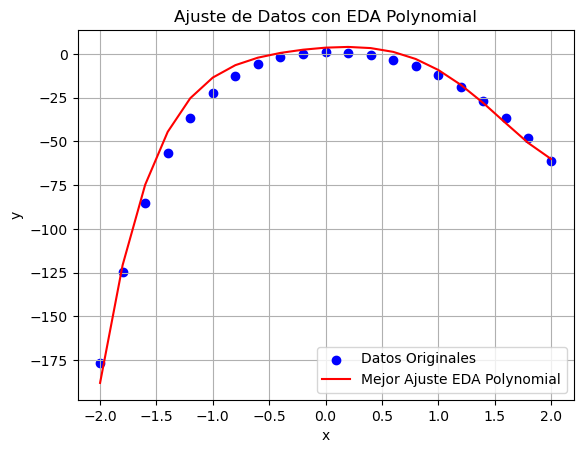

In [ ]:
# Test de EDA polynomial
from relax_gen import GEN
import numpy as np
import pandas as pd

db = pd.read_csv("data.csv")
model = GEN(datos=db.values, 
            population=200, 
            i_max=10, 
            i_min=-10, 
            num_cycles=2000, 
            model = "polynomial", 
            num_variables=6)

resultado, fintess = model.alg_eda()
print("Mejor solución EDA Polynomial:", resultado)
print("Fitness de la mejor solución EDA Polynomial:", fintess)

mejor_y = resultado[0] + resultado[1]*db["x"] + resultado[2]*db["x"]**2 + resultado[3]*db["x"]**3 + resultado[4]*db["x"]**4 + resultado[5]*db["x"]**5
mejor_y = np.array(mejor_y)
# Ordenamos para graficar correctamente
x_ord = np.sort(db["x"])
mejor_y_ord = mejor_y[np.argsort(db["x"])]

# Graficamos el resultado y la función objetivo
plt.scatter(db["x"], db["y"], label='Datos Originales', color='blue')
plt.plot(x_ord, mejor_y_ord, label='Mejor Ajuste EDA Polynomial', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de Datos con EDA Polynomial')
plt.legend()
plt.grid()
plt.show()